 **Rental Bike Sharing**


---
---


#Abstracto


Los sistemas de bicicletas compartidas son una nueva generación de alquileres de bicicletas tradicionales en los que todo el proceso, desde la afiliación, el alquiler y la devolución, se ha vuelto automático. A través de estos sistemas, el usuario puede alquilar fácilmente una bicicleta desde una posición particular y regresar en otra posición. Actualmente, hay alrededor de 500 programas de bicicletas compartidas en todo el mundo que se componen de más de 500 mil bicicletas. Hoy en día, existe un gran interés en estos sistemas debido a su importante papel en cuestiones de tráfico, medio ambiente y salud.

Aparte de las interesantes aplicaciones del mundo real de los sistemas de bicicletas compartidas, las características de los datos generados por estos sistemas los hacen atractivos para la investigación. A diferencia de otros servicios de transporte como el autobús o el metro, en estos sistemas se registra explícitamente la duración del viaje, la posición de salida y de llegada. Esta función convierte el sistema de bicicletas compartidas en una red de sensores virtual que se puede utilizar para detectar la movilidad en la ciudad. Por lo tanto, se espera que la mayoría de los eventos importantes en la ciudad puedan detectarse a través del monitoreo de estos datos.

#Contexto comercial

El dueño de una compañia de alquiler de bicicletas necesita optimizar la cantidad de bicicletas que pondrá a disposión (momentos de mayor demanda) y quiere conocer cuales son los mejores momentos para retirar bicicletas de circulación para su reparación (momentos de menor demanda). Con este objetivo, hemos sido contratados 

Las bicicletas estan a disposición de los usuarios las 24 horas del día, los 7 días de la semana.

El sistema de alquiler registra la hora y dia de retiro, detallando si el cliente es habitual o casual



#Problema comercial

La tarea es encontrar patrones en el alquiler de las bicicletas, para detectar los momentos de mayor y menor demanda

Para eso nos preguntamos:


- ¿el clima afecta el alquiler de bicicletas?
- ¿cuales son las horas picos de alquiler?
- ¿cuales son los días de mas alquiler?
- ¿hay meses con mayor alquiler?
- ¿como se comporta el alquiler año tras año?


#Contexto analitico

La compañia nos brinda la información de 2 años de alquiler (2011 y 2012), detallada día por día, abierto en 24 horas. 
La información tambien incluye el estado del clima ( http://www.freemeteo.com) y el calendario de los dias feriados (http://dchr.dc.gov/page/holiday-schedule)


Nos facilita el manual del sistema donde detalla los campos:

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not 
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
-atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
-hum: Normalized humidity. The values are divided to 100 (max)
-windspeed: Normalized wind speed. The values are divided to 67 (max)
-casual: count of casual users
-registered: count of registered users
-cnt: count of total rental bikes including both casual and registered

#Analisis exploratorio de datos (EDA)

## Carga de datos

fuente:https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing



In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt


drive.mount('/content/drive')
%cd  "/content/drive/MyDrive/Coderhouse/4ta entrega"


Mounted at /content/drive
/content/drive/MyDrive/Coderhouse/4ta entrega


In [ ]:
df = pd.read_csv ("Bicicletas por hora.csv",sep = ",")

In [ ]:
df.head() 


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Primeras impresiones


Los datos corresponden al alquiler de bicicletas de 2 años (2011 y 2012), abierto en las 24 horas del dia

In [ ]:
df["dteday"][0] #primera fecha


'2011-01-01'

In [ ]:
df["dteday"][17378] #ultima fecha (segun los registros contados en el describe)

'2012-12-31'

In [ ]:
print(df["dteday"].min(),df["dteday"].max()) #control por si las fechas no estan ordenadas

2011-01-01 2012-12-31


In [ ]:
df["hr"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

El rango de fechas arranca el 01/01/2011 y termina el 31/12/2012.

Las horas estan registradas desde las 0 hasta las 23 

Siendo que cada año tiene 365, el total de los registros deberia ser:
365 * 24 (horas) * 2 (años)


In [ ]:
365*24 *2


17520

Total de registros (segun describe) = 17.379 vs 17.520

a primera vista se observa que, o faltan dias, o que algunos dias no tienen las 24 horas

In [ ]:
print("registros:",df["dteday"].nunique())
print("dias 2 años:",365*2)

registros: 731
dias 2 años: 730


Hay un dia mas en los registros. **El año 2012 es bisiesto.**

El total de registros deberia ser entonces:



In [ ]:
731*24


17544


**Conclusión: Estan todos los dias de los 2 años, pero hay dias que no tienen todas las horas.**

In [ ]:
(731*24 - 17379) / (731*24) *100

0.9404924760601915

faltan 165 registros de horas (menos de 1% sobre la totalidad de los datos)

**¿que horas faltan?**

sabiendo que hay 731 dias, cada hora se deria repetir esa cantidad de veces



In [ ]:
qhoras = df.groupby(["hr"],sort=True)["hr"].count() -731
qhoras = -qhoras

In [ ]:
qhoras.sum() #suma lo mismo que los registros faltantes

165

In [ ]:
dfqhoras = pd.DataFrame({"hora": range(24),"faltante": qhoras})


[Text(0.5, 1.0, 'Cantidad de registros faltantes segun la hora')]

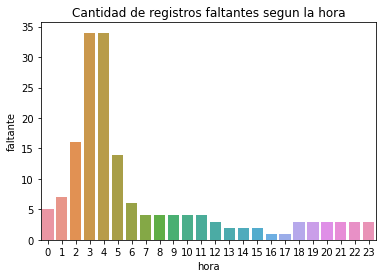

In [ ]:
sns.barplot(data=dfqhoras,x="hora",y="faltante").set(title="Cantidad de registros faltantes segun la hora")

entre las 0 horas y las 6 se encuentran la mayor cantidad de faltantes. Suena logico que no se hayan alquilado bicicletas en ese horario

**¿hay dias con pocas horas?**

In [ ]:
dias_horas = df.groupby(["dteday"],sort=True)["hr"].count()

In [ ]:
dias_horas[dias_horas<24]

dteday
2011-01-02    23
2011-01-03    22
2011-01-04    23
2011-01-05    23
2011-01-06    23
              ..
2012-10-30    11
2012-11-08    23
2012-11-29    23
2012-12-24    23
2012-12-25    23
Name: hr, Length: 76, dtype: int64

Hay 76 dias que le fantan horas. Lo "normal" serian entre 2 o 3 (max 6 horas , teniendo en cuenta que desde las 0 a las 6 hay poco movimiento)  pero en la primera impresión se ve un valor que le faltan 11 horas

In [ ]:
for a in range(23):
  print(dias_horas[dias_horas==a])

Series([], Name: hr, dtype: int64)
dteday
2012-10-29    1
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2011-01-27    8
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2012-10-30    11
Name: hr, dtype: int64
dteday
2011-01-18    12
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2011-01-26    16
Name: hr, dtype: int64
dteday
2011-08-28    17
Name: hr, dtype: int64
dteday
2011-02-22    18
2011-08-27    18
Name: hr, dtype: int64
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
Series([], Name: hr, dtype: int64)
dteday
2011-01-03    22
2011-01-11    22
2011-01-12    22
2011-02-11    22
2011-02-28    22
2011-03-10    22
Name: hr, dtype: int64

Dias anomalos:

2012-10-29    1 hora solamente **actualizado: huracan Sandy**

2012-10-30    11 horas solamente **actualizado: huracan Sandy**

2011-01-26    16 horas solamente **actualizado: The Carmageddon Snowstorm**

2011-01-27    8 horas solamente **actualizado: The Carmageddon Snowstorm**

2011-01-18    12 horas solamente **actualizado: The Carmageddon Snowstorm**

2011-08-28    17 horas solamente **actualizado: Huracan Irene**


tomando como "normal" que falten 6 horas en el dia (franja entre las 0 horas a las 6), el resto de los dias se comportarian normalmente

hay dias correlativos: 29 y 30 de octubre 2012 / 26 y 27 de enero 2011

**Ejemplo del dia faltante 29-10-2012: Evaluo los datos del dia anterior y posterior**



In [ ]:
df[(df.dteday.isin(["2012-10-29","2012-10-28","2012-10-30"]))]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
15859,15860,2012-10-28,4,1,10,0,0,0,0,3,0.52,0.5000,0.68,0.2985,20,97,117
15860,15861,2012-10-28,4,1,10,1,0,0,0,2,0.50,0.4848,0.72,0.2836,22,111,133
15861,15862,2012-10-28,4,1,10,2,0,0,0,2,0.50,0.4848,0.68,0.2985,17,99,116
15862,15863,2012-10-28,4,1,10,3,0,0,0,2,0.50,0.4848,0.63,0.3284,18,61,79
15863,15864,2012-10-28,4,1,10,4,0,0,0,2,0.50,0.4848,0.63,0.3582,1,19,20
15864,15865,2012-10-28,4,1,10,5,0,0,0,2,0.50,0.4848,0.63,0.2985,6,22,28
15865,15866,2012-10-28,4,1,10,6,0,0,0,2,0.50,0.4848,0.59,0.3284,7,32,39
15866,15867,2012-10-28,4,1,10,7,0,0,0,2,0.50,0.4848,0.59,0.2985,17,48,65
15867,15868,2012-10-28,4,1,10,8,0,0,0,2,0.50,0.4848,0.59,0.5522,55,118,173
15868,15869,2012-10-28,4,1,10,9,0,0,0,2,0.50,0.4848,0.55,0.4179,124,206,330


En principio parece ser que el clima no era optimo (weathersit = 3). El dia 29 arranca (0 hs) y el proximo registro es el 30 a las 13 hs. Suponia una tormenta, y **al googlear confirmo que la fecha coincide con el huracan Sandy**

**Conclusión: El dataset parece estar completo. Las horas que faltan no parecen ser registros faltantes sino horarios en los cual no hubo movimiento. La gente no alquila bicicletas si hay huracan 😲**

## Modificacion dataset

### Eliminacion Columnas

In [ ]:
del df["instant"] #es una columna indice

### Modifcación a columnas numericas a categoricas

In [ ]:
df["yr"].unique() # control sobre los valores del año.....0 es 2011 y 1 es 2012

array([0, 1])

In [ ]:
# yr lo transformo en categorias
df["yr"] = df["yr"].replace({0: "año 2011", 1: "año 2012"})

In [ ]:
df["season"].unique() #las estaciones son: 1 primavera, 2 verano, 3 otoño, 4 invierno

array([1, 2, 3, 4])

In [ ]:
df["season"] = df["season"].replace({1:"primavera",2:"verano",3:"otoño",4:"invierno"})

In [ ]:
df["holiday"].unique() #feriado o no

array([0, 1])

In [ ]:
print("feriados:",df[df["holiday"] ==1]["holiday"].count())
print("dias habiles:",df[df["holiday"] ==0]["holiday"].count())  #1 es ferido 

feriados: 500
dias habiles: 16879


500 registros de feriados / 24 horas / 2 años = 10 feriados por año

es una cuenta simplificada porque estoy suponiendo que los dias feriados tienen 24 horas completas. Es solo para evaluar la razonabilidad del valor

In [ ]:
df["holiday"] =df["holiday"].replace({0:"no",1:"si"})

In [ ]:
df["workingday"].unique() #si el dia no es fin de semana ni feriado entonces = 1 sino es 0

array([0, 1])

In [ ]:
df[df["workingday"]==1]["workingday"].count() #1 = dia laboral

11865

(5 dias laborables a la semana x 4 semanas por mes x 12 meses x 2 años) + 20 (10 feriados por año) x 24 horas

In [ ]:
((5*4*12*2)+20)*24

12000

12.000 vs 11.865 razonable como prueba global

In [ ]:
df["workingday"] = df["workingday"].replace ({0:"no",1:"si"})

In [ ]:
df["weathersit"].unique()

array([1, 2, 3, 4])

Segun la fuente de datos, los valores representan:

1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


a fin de simplificar, reemplazo los valores de la siguiente manera:
1 = Excelente
2 = Bueno
3 = Regular
4 = Malo



In [ ]:
df["weathersit"] =df["weathersit"].replace ({1:"excelente",2:"bueno",3:"regular",4:"malo"})

In [ ]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,primavera,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,primavera,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,primavera,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,primavera,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,primavera,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1


### Agrego columna catcnt

In [ ]:
df["catcnt"] = ""
df.loc[df["cnt"] > 0, "catcnt"] = "Entre 1  y 100"
df.loc[df["cnt"] > 100, "catcnt"] = "Entre 100  y 200"
df.loc[df["cnt"] > 200, "catcnt"] = "Entre 200 y 300"
df.loc[df["cnt"] > 300, "catcnt"] = "Mayor a 300" 


In [ ]:
df.catcnt.value_counts() #cuenta de las categorias

Entre 1  y 100      7035
Mayor a 300         3891
Entre 100  y 200    3749
Entre 200 y 300     2704
Name: catcnt, dtype: int64

In [ ]:
df.catcnt.value_counts(normalize=True)*100

Entre 1  y 100      40.479890
Mayor a 300         22.389090
Entre 100  y 200    21.572012
Entre 200 y 300     15.559008
Name: catcnt, dtype: float64

In [ ]:
df.groupby(['catcnt'])["cnt"].sum()/df["cnt"].sum()*100

catcnt
Entre 1  y 100       7.620360
Entre 100  y 200    16.904867
Entre 200 y 300     20.224838
Mayor a 300         55.249935
Name: cnt, dtype: float64

### Agregar dia de la semana (en letras)

In [ ]:
df["dia_sem_letra"] = df["weekday"]

df.dia_sem_letra = df.dia_sem_letra.replace({0: "dom", 1: "lun",2:"mar",3:"mie",4:"jue",5:"vie",6:"sab"})

df.head()
df["dia_sem_letra"].unique() #para probar si tomo todos los dias









array(['sab', 'dom', 'lun', 'mar', 'mie', 'jue', 'vie'], dtype=object)

In [ ]:
df.head(20)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra
0,2011-01-01,primavera,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0000,3,13,16,Entre 1 y 100,sab
1,2011-01-01,primavera,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0000,8,32,40,Entre 1 y 100,sab
2,2011-01-01,primavera,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0000,5,27,32,Entre 1 y 100,sab
3,2011-01-01,primavera,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0000,3,10,13,Entre 1 y 100,sab
4,2011-01-01,primavera,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0000,0,1,1,Entre 1 y 100,sab
5,2011-01-01,primavera,año 2011,1,5,no,6,no,bueno,0.24,0.2576,0.75,0.0896,0,1,1,Entre 1 y 100,sab
6,2011-01-01,primavera,año 2011,1,6,no,6,no,excelente,0.22,0.2727,0.80,0.0000,2,0,2,Entre 1 y 100,sab
7,2011-01-01,primavera,año 2011,1,7,no,6,no,excelente,0.20,0.2576,0.86,0.0000,1,2,3,Entre 1 y 100,sab
8,2011-01-01,primavera,año 2011,1,8,no,6,no,excelente,0.24,0.2879,0.75,0.0000,1,7,8,Entre 1 y 100,sab
9,2011-01-01,primavera,año 2011,1,9,no,6,no,excelente,0.32,0.3485,0.76,0.0000,8,6,14,Entre 1 y 100,sab


### Temperatura, Sensación Termica y viento

In [ ]:
# la temperatura (temp) esta normalizada
#(t-tmin)/(tmax-tmin), tmin=-8, t_max=+39


df["temperatura"] = df["temp"]*47 -8
df.head()
 

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura
0,2011-01-01,primavera,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16,Entre 1 y 100,sab,3.28
1,2011-01-01,primavera,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40,Entre 1 y 100,sab,2.34
2,2011-01-01,primavera,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32,Entre 1 y 100,sab,2.34
3,2011-01-01,primavera,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13,Entre 1 y 100,sab,3.28
4,2011-01-01,primavera,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1,Entre 1 y 100,sab,3.28


In [ ]:
# Sensacion terminica normalizada (atemp)
#(t-tmin)/(tmax-tmin), tmin=-16, t_max=+50

df["st"] = df["atemp"] * 66 -16
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st
0,2011-01-01,primavera,año 2011,1,0,no,6,no,excelente,0.24,0.2879,0.81,0.0,3,13,16,Entre 1 y 100,sab,3.28,3.0014
1,2011-01-01,primavera,año 2011,1,1,no,6,no,excelente,0.22,0.2727,0.80,0.0,8,32,40,Entre 1 y 100,sab,2.34,1.9982
2,2011-01-01,primavera,año 2011,1,2,no,6,no,excelente,0.22,0.2727,0.80,0.0,5,27,32,Entre 1 y 100,sab,2.34,1.9982
3,2011-01-01,primavera,año 2011,1,3,no,6,no,excelente,0.24,0.2879,0.75,0.0,3,10,13,Entre 1 y 100,sab,3.28,3.0014
4,2011-01-01,primavera,año 2011,1,4,no,6,no,excelente,0.24,0.2879,0.75,0.0,0,1,1,Entre 1 y 100,sab,3.28,3.0014


In [ ]:
#viento normalizado en 67
df["viento"] = df["windspeed"]*67
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,hum,windspeed,casual,registered,cnt,catcnt,dia_sem_letra,temperatura,st,viento
0,2011-01-01,primavera,año 2011,1,0,no,6,no,excelente,0.24,...,0.81,0.0,3,13,16,Entre 1 y 100,sab,3.28,3.0014,0.0
1,2011-01-01,primavera,año 2011,1,1,no,6,no,excelente,0.22,...,0.80,0.0,8,32,40,Entre 1 y 100,sab,2.34,1.9982,0.0
2,2011-01-01,primavera,año 2011,1,2,no,6,no,excelente,0.22,...,0.80,0.0,5,27,32,Entre 1 y 100,sab,2.34,1.9982,0.0
3,2011-01-01,primavera,año 2011,1,3,no,6,no,excelente,0.24,...,0.75,0.0,3,10,13,Entre 1 y 100,sab,3.28,3.0014,0.0
4,2011-01-01,primavera,año 2011,1,4,no,6,no,excelente,0.24,...,0.75,0.0,0,1,1,Entre 1 y 100,sab,3.28,3.0014,0.0


# Respuestas y conclusiones

## ¿El alquiler de bicicletas varia segun el día de la semana?

Text(0.5, 0, 'Día de la semana')

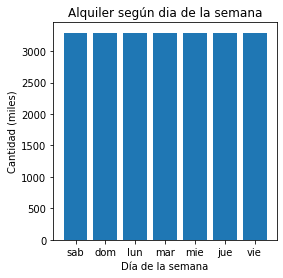

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["dia_sem_letra"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según dia de la semana")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Día de la semana")



In [ ]:
df.groupby("dia_sem_letra")[["cnt"]].sum() #comprobacion de los valores del grafico anterior

,cnt
dia_sem_letra,
dom,444027
jue,485395
lun,455503
mar,469109
mie,473048
sab,477807
vie,487790


**Conclusión: El alquiler de bicicletas es relativamente constante en los distintos dias de la semana**

## ¿hay meses de mayor alquiler?

Text(0.5, 0, 'Mes')

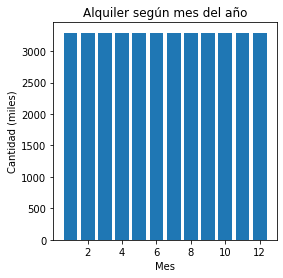

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["mnth"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según mes del año")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Mes")

**conclusión: No hay variacion significativa respecto a los meses**

## ¿como se comportó el 2011 vs 2012?

Text(0.5, 0, 'Año')

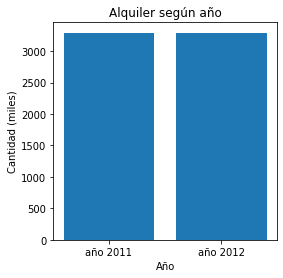

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["yr"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según año")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Año")

**Conclusión: No hay variación significativa respecto al año**

## ¿como se comportan el alquiler con las estaciones del año?

Text(0.5, 0, 'Estación')

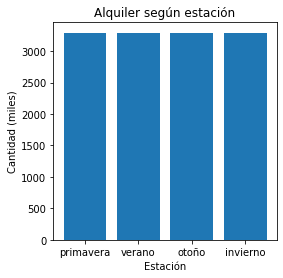

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(df["season"],df["cnt"].sum()/1000)
ax.set_title("Alquiler según estación")
ax.set_ylabel ("Cantidad (miles)")
ax.set_xlabel ("Estación")

**conclusión: No hay variación significativa según la estación**

## ¿El alquiler varia segun la sensación termica y la temperatura ?




Text(0, 0.5, 'Cantidad')

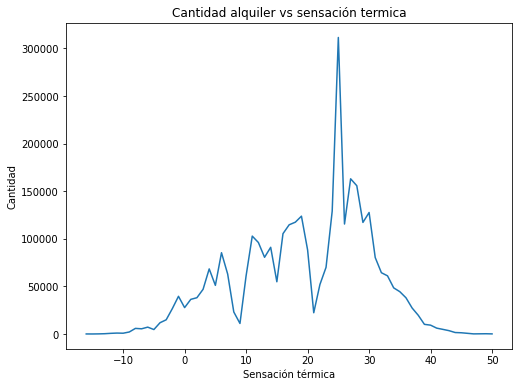

In [ ]:
datos= df.groupby("st")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs sensación termica")
ax.set_xlabel("Sensación térmica")
ax.set_ylabel("Cantidad")

[Text(0.5, 1.0, 'Dispersión Cantidad vs sensación termica')]

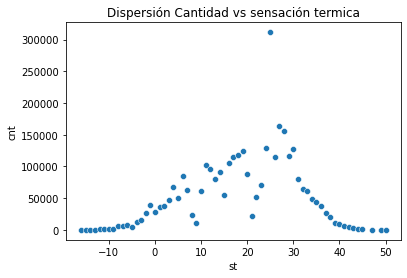

In [ ]:
sns.scatterplot(data = datos,x="st",y="cnt").set(title = "Dispersión Cantidad vs sensación termica")

Text(0, 0.5, 'Cantidad')

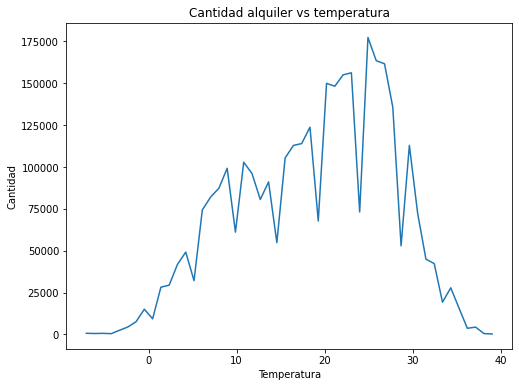

In [ ]:
# Igual pero con temperatura
datos= df.groupby("temperatura")[["cnt"]].sum()
fig, ax = plt.subplots(figsize = (8,6))
ax.plot (datos.index,datos["cnt"])
ax.set_title("Cantidad alquiler vs temperatura")
ax.set_xlabel("Temperatura")
ax.set_ylabel("Cantidad")

[Text(0.5, 0, 'cantidad alquilada'),
 Text(0.5, 1.0, 'Dispersión Cantidad vs temperatura. Datos agrupados')]

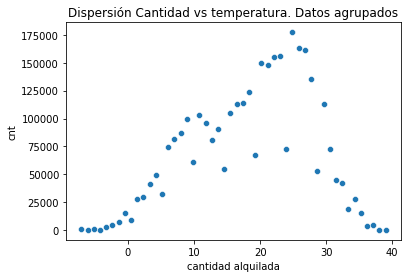

In [ ]:
sns.scatterplot(data = datos,x="temperatura",y="cnt").set(title = "Dispersión Cantidad vs temperatura. Datos agrupados",xlabel="cantidad alquilada")


[Text(0.5, 0, 'cantidad alquilada'),
 Text(0.5, 1.0, 'Dispersión Cantidad vs temperatura')]

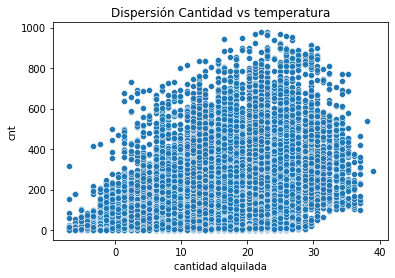

In [ ]:
sns.scatterplot(data= df,x="temperatura",y="cnt").set(title = "Dispersión Cantidad vs temperatura",xlabel="cantidad alquilada")

**Conclusión: a mas temperatura / sensación termica, en principio se nota un ascenso en las cantidades alquiladas, pero en ambos casos hay picos hacia arriba y hacia abajo.**
**Luego la curva decrece**




## el viento, ¿afecta a la cantidad alquilada?



Text(0.5, 0, 'Viento')

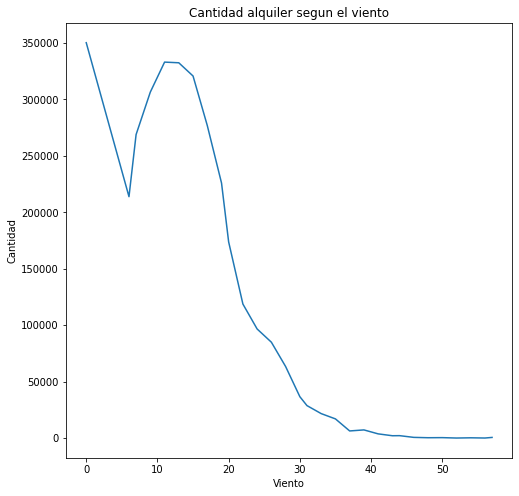

In [ ]:
datos= df.groupby("viento")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun el viento")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Viento")

[Text(0.5, 0, 'cantidad alquilada'),
 Text(0.5, 1.0, 'Dispersión Cantidad vs viento')]

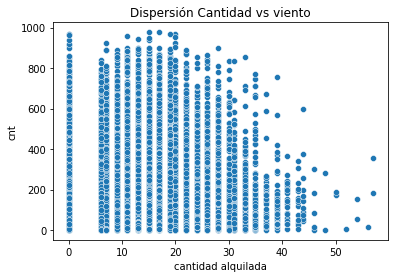

In [ ]:
sns.scatterplot(data= df,x="viento",y="cnt").set(title = "Dispersión Cantidad vs viento",xlabel="cantidad alquilada")

[Text(0.5, 0, 'cantidad alquilada'),
 Text(0.5, 1.0, 'Dispersión Cantidad vs viento. Datos agrupados')]

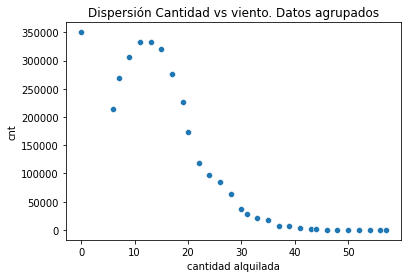

In [ ]:
sns.scatterplot(data= datos,x="viento",y="cnt").set(title = "Dispersión Cantidad vs viento. Datos agrupados",xlabel="cantidad alquilada")

**Conclusión: a mas viento menos alquiler. Hay un comportamiento raro en los primeros valores del viento**

## ¿y según la humedad?

Text(0.5, 0, 'Humedad')

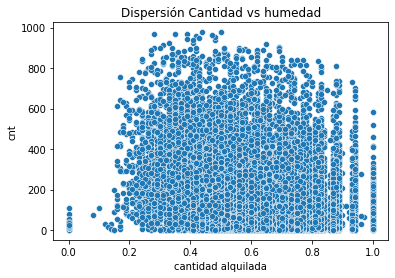

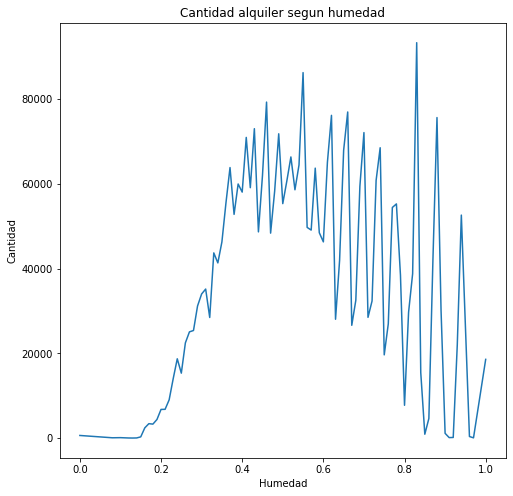

In [ ]:
sns.scatterplot(data= df,x="hum",y="cnt").set(title = "Dispersión Cantidad vs humedad",xlabel="cantidad alquilada")
datos= df.groupby("hum")[["cnt"]].sum()
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(datos.index,datos["cnt"])
ax.set_title ("Cantidad alquiler segun humedad")
ax.set_ylabel("Cantidad")
ax.set_xlabel ("Humedad")

**Conclusión: El campo humedad está normalizado (dividido en 100). Se ve un incremento de alquiler a mas humedad y luego desciende con picos importantes en los valores**

## ¿Hay horas picos en el alquier?



<function matplotlib.pyplot.show(*args, **kw)>

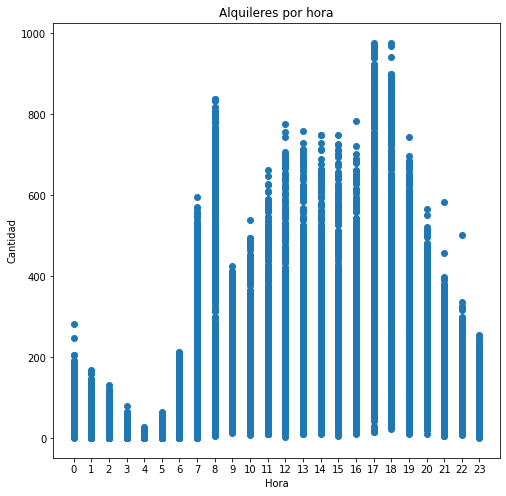

In [ ]:
from matplotlib.ticker import MultipleLocator
fig,ax = plt.subplots(figsize = (8,8))
ax.scatter(df["hr"],df["cnt"])
ax.set_title("Alquileres por hora")
ax.set_xlabel ("Hora")
ax.set_ylabel ("Cantidad")
#plt.xticks(rotation=45)
#ax.xaxis.set_major_locator(MultipleLocator(1))
plt.xticks(range(0,24,1))
plt.show

Como se menciono al inicio, entre las 0 horas y las 6 se registran los valores mas bajos

**Comportamiento segun el dia (horas vs cantidad)**
siguiendo la idea del grafico anterior, se evalua por dia.

se observan comportamientos parecidos:

*   sabados y domingos
*   luns a viernes



<function matplotlib.pyplot.show(*args, **kw)>

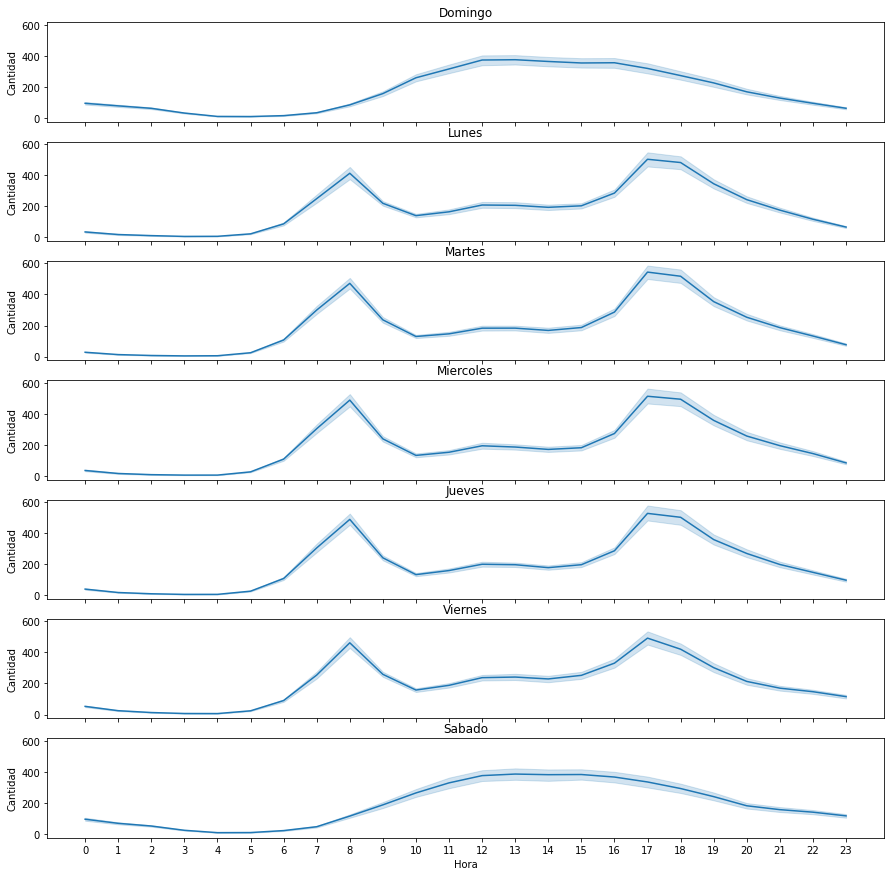

In [ ]:
fig, axes = plt.subplots(7, 1, figsize=(15, 15), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = df[df["weekday"]==0], y="cnt",x="hr").set(title = "Domingo",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[1], data = df[df["weekday"]==1], y="cnt",x="hr").set(title = "Lunes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[2], data = df[df["weekday"]==2], y="cnt",x="hr").set(title = "Martes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[3], data = df[df["weekday"]==3], y="cnt",x="hr").set(title = "Miercoles",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[4], data = df[df["weekday"]==4], y="cnt",x="hr").set(title = "Jueves",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[5], data = df[df["weekday"]==5], y="cnt",x="hr").set(title = "Viernes",xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[6], data = df[df["weekday"]==6], y="cnt",x="hr").set(title = "Sabado",xlabel="Hora",ylabel="Cantidad")

#ax[0].grid(axis='both')
#ax[1].grid(axis='both')

plt.xticks(range(0,24,1))

plt.show

**Dias de semana vs fin de semana (horas vs cantidad)**

en la semana los picos se dan a las 8 y las 17 (supongo entrada/salida trabajo)

en el fin de semana hay un consumo mas achatado con valores maximos entre las 12 y las 16

In [ ]:

lun_a_sab = df[df["weekday"] >0]
lun_a_vie = lun_a_sab[lun_a_sab["weekday"]<6]  # no encontre la forma de filtrar en un solo paso
dom = df[df["dia_sem_letra"] =="dom"]
sab= df[df["dia_sem_letra"] =="sab"]
sab_y_dom = pd.concat([dom,sab])



<function matplotlib.pyplot.show(*args, **kw)>

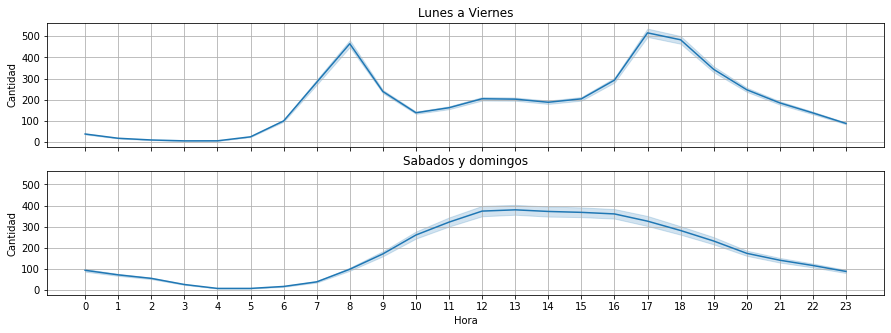

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True,sharex=True)
sns.lineplot(ax= axes[0], data = lun_a_vie, y="cnt",x="hr").set(xlabel="Hora",ylabel="Cantidad")
sns.lineplot(ax= axes[1], data = sab_y_dom, y="cnt",x="hr").set(xlabel="Hora",ylabel="Cantidad")

axes[0].grid(axis='both')
axes[1].grid(axis='both')
axes[0].set_title("Lunes a Viernes")
axes[1].set_title("Sabados y domingos")



plt.xticks(range(0,24,1))
plt.show

**Conclusión: hay diferentes horas picos según si es dia de la semana o no. De 0 a 6 son los horarios de menor alquiler**

## ¿hay relacion entre la Temperatura  - sensacion termica vs weathersit	(categorias de clima)?



[Text(0, 0.5, 'Sensación termica'),
 Text(0.5, 1.0, 'Categoria clima vs sensacion termica')]

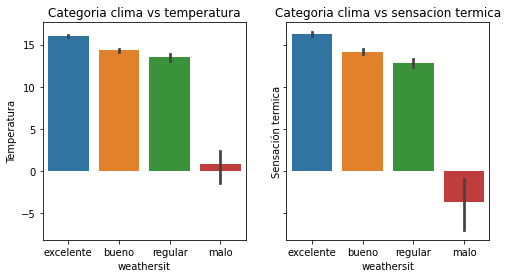

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)
sns.barplot(ax =axes[0] , x="weathersit",y="temperatura",data=df).set(title = "Categoria clima vs temperatura",ylabel="Temperatura")
sns.barplot(ax =axes[1] , x="weathersit",y="st",data=df).set(title = "Categoria clima vs sensacion termica",ylabel="Sensación termica")

[Text(0.5, 1.0, 'Cat clima vs sensacion termica')]

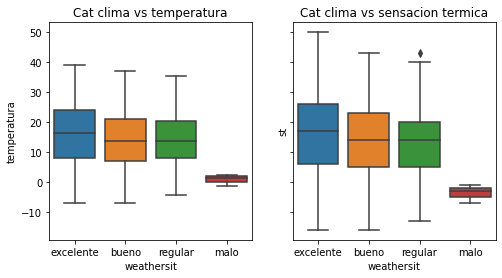

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)
sns.boxplot(x="weathersit",y="temperatura",data=df,ax = axes[0]).set(title = "Cat clima vs temperatura")

sns.boxplot(x="weathersit",y="st",data=df,ax = axes[1]).set(title = "Cat clima vs sensacion termica")

A mejor categoria de clima, mayor temperatura y sensación termica.

Los valores parecen tener una correcta distribución


## ¿y clima vs viento?

[Text(0, 0.5, 'Viento'),
 Text(0.5, 0, 'Clima'),
 Text(0.5, 1.0, 'Viento vs clima')]

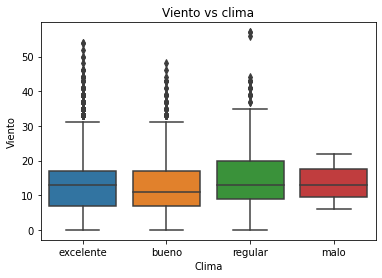

In [ ]:
sns.boxplot(x="weathersit",y="viento",data=df).set(title = "Viento vs clima",xlabel = "Clima",ylabel="Viento")

## ¿como afecta el climan general (weathersit) a la cantidad alquilada?


[Text(0, 0.5, 'Cantidad'), Text(0.5, 0, 'Clima')]

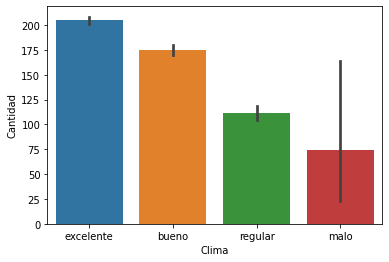

In [ ]:
sns.barplot(data=df,x="weathersit",y="cnt").set(xlabel= "Clima",ylabel="Cantidad")


In [ ]:
df.groupby("weathersit")["cnt"].sum() 

weathersit
bueno         795952
excelente    2338173
malo             223
regular       158331
Name: cnt, dtype: int64

In [ ]:
df.groupby(['weathersit','catcnt'])["cnt"].count() #prueba por categoria

weathersit  catcnt          
bueno       Entre 1  y 100      1891
            Entre 100  y 200    1051
            Entre 200 y 300      739
            Mayor a 300          863
excelente   Entre 1  y 100      4252
            Entre 100  y 200    2419
            Entre 200 y 300     1843
            Mayor a 300         2899
malo        Entre 1  y 100         2
            Entre 100  y 200       1
regular     Entre 1  y 100       890
            Entre 100  y 200     278
            Entre 200 y 300      122
            Mayor a 300          129
Name: cnt, dtype: int64

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

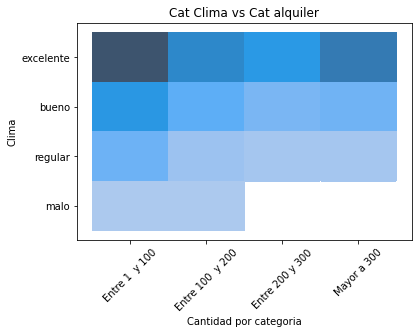

In [ ]:
sns.histplot(data=df,x="catcnt",y="weathersit").set(title="Cat Clima vs Cat alquiler",xlabel = "Cantidad por categoria",ylabel="Clima")
plt.xticks(rotation=45)

**Conclusión:**
**La cantidad alquilada esta claramente afectada por el clima (weathersit).** 

**La temperatura y sensacion terminca tambien tienen una relación directa con el clima pero no es tan clara al verlo vs la cantidad alquilada**




# Recomendaciones

Del analisis exploratorio se puede concluir que la cantidad de bicicletas depende de los horarios (según el dia de la semana) y el clima. Mientras el clima sea "bueno", los horarios nocturnos son los mejores para retirar bicicletas para reparación (menor demanda), y se deberen reforzar las cantidades disponibles los dias laborales, en los horarios de inicio y finalizacion de la jornada laboral. 
En epocas de tornado / tormenta de nieve no hay alquiler siendo el mejor momento para reparar la mayor cantidad de bicicletas.